---
title: "A couple steps we need to implement before classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Artists

In [9]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
artists = pd.read_csv('../data/clean_data/artists.csv')

# what does that data look like? 
artists.head(20)

,artist_name,artist_id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key_mode,genre1,genre2,genre3
0,Green Day,7oPftvlwr6VrsViSDV7fJY,0.435219,0.895942,-4.404705,0.071970,0.029052,2.420668e-02,0.210100,0.658430,140.041634,189080.946429,D major,rock,NaN,NaN
1,Dusty Springfield,5zaXYwewAXedKNCff45U5l,0.485341,0.498333,-10.186623,0.043030,0.518770,1.524729e-02,0.222696,0.565521,116.199674,195254.239130,D major,jazz,NaN,NaN
2,Hozier,2FXC3k01G6Gw61bmprjgqS,0.448021,0.516437,-7.487792,0.046327,0.384334,4.871918e-02,0.136029,0.339523,116.836062,241630.729167,G major,rock,NaN,NaN
3,Ms. Lauryn Hill,2Mu5NfyYm8n5iTomuKAEHl,0.652385,0.493627,-12.291385,0.302931,0.270838,4.171400e-04,0.258950,0.610846,102.295308,281465.692308,C# major,soul,NaN,NaN
4,Incubus,3YcBF2ttyueytpXtEzn1Za,0.508414,0.786576,-6.192253,0.057951,0.080398,7.619580e-02,0.181052,0.432140,134.341747,245848.595960,A major,funk,NaN,NaN
5,Farruko,329e4yvIujISKGKz1BZZbO,0.695963,0.745696,-5.090474,0.100282,0.214355,5.877183e-04,0.217191,0.597800,123.408267,223879.296296,B minor,latin,NaN,NaN
6,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,0.530749,0.787411,-5.798831,0.067306,0.068541,5.678086e-02,0.170656,0.500953,120.363904,259293.369863,C major,funk,rock,NaN
7,Kali Uchis,1U1el3k54VvEUzo3ybLPlM,0.636603,0.555097,-7.841090,0.067583,0.286546,2.188057e-02,0.191645,0.473921,117.950526,180635.435897,F# minor,pop,NaN,NaN
8,Swedish House Mafia,1h6Cn3P4NGzXbaXidqURXs,0.585440,0.657280,-7.711320,0.090740,0.082635,3.906170e-01,0.215492,0.201592,124.436000,269980.920000,D major,edm,NaN,NaN
9,Dean Martin,49e4v89VmlDcFCMyDv9wQ9,0.495437,0.428639,-10.407168,0.039445,0.689061,3.668141e-03,0.200671,0.532756,117.147185,162275.126050,D# major,jazz,NaN,NaN


In [10]:
# concatenate all the genre columns and get value counts
all_genres = pd.concat([artists['genre1'], artists['genre2'], artists['genre3']])
all_genres.value_counts()

rock       53
pop        52
hip hop    50
country    50
soul       49
jazz       48
latin      48
edm        47
funk       46
rap        40
Name: count, dtype: int64

this data is rather balanced

# Tracks

In [11]:
# load in the data
tracks = pd.read_csv('../data/clean_data/tracks.csv')

# what does that data look like?
tracks.head()

,artist_name,artist_id,album_id,album_release_year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,time_signature,duration_ms,track_name,album_name,key_mode,decade
0,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.787,0.889,-3.125,0.1280,0.00951,0.000322,0.6520,0.677,156.027,49YpGS0rVcRLtiDvx5JQyp,4,172399,Sorry for the Delay,DIRTIESTNASTIEST$UICIDE,D major,2020s
1,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.759,0.833,-5.010,0.0779,0.00026,0.057300,0.1780,0.522,140.026,5dol1hrERJOReznLRJ2VVQ,4,183919,BUCKHEAD,DIRTIESTNASTIEST$UICIDE,B major,2020s
2,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.840,0.934,-3.717,0.1190,0.04840,0.000000,0.0961,0.670,149.994,3QQXpvZd9qmzHZ02wDf2im,4,145842,I Dream of Chrome,DIRTIESTNASTIEST$UICIDE,C major,2020s
3,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.894,0.767,-4.695,0.1370,0.02310,0.000024,0.5740,0.412,144.077,1UsvO5U72YRU8Xnq8Lp14O,4,140288,Champagne Face,DIRTIESTNASTIEST$UICIDE,A# minor,2020s
4,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.780,0.780,-2.857,0.0858,0.00147,0.000000,0.4720,0.446,118.014,2CkpD7gqMXrrpTCJ9TZ0bw,4,177289,The Serpent and the Rainbow,DIRTIESTNASTIEST$UICIDE,C major,2020s


In [12]:
# value counts of decade column
tracks['decade'].value_counts()

decade
2010s    18863
2020s    14510
2000s     7590
1990s     4637
1960s     3738
1970s     3241
1980s     2519
1950s     1159
1940s        1
Name: count, dtype: int64

In [14]:
# what track is from the 1940s?
tracks[tracks['decade'] == '1940s']

,artist_name,artist_id,album_id,album_release_year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,time_signature,duration_ms,track_name,album_name,key_mode,decade
19526,Ella Fitzgerald,5V0MlUE1Bft0mbLlND7FJz,2fGMswDHpzaSIg1t1ksNYj,1947,0.446,0.0555,-14.215,0.0639,0.969,0.0,0.189,0.319,78.291,07rlrCEfUJ2h6uJ4pHpSv2,4,158613,I’m The Lonesomest Gal In Town,Souvenir Album,G minor,1940s


In [15]:
# delete the above track
tracks = tracks[tracks['decade'] != '1940s']

# value counts of decade column
tracks['decade'].value_counts()

decade
2010s    18863
2020s    14510
2000s     7590
1990s     4637
1960s     3738
1970s     3241
1980s     2519
1950s     1159
Name: count, dtype: int64

<Axes: >

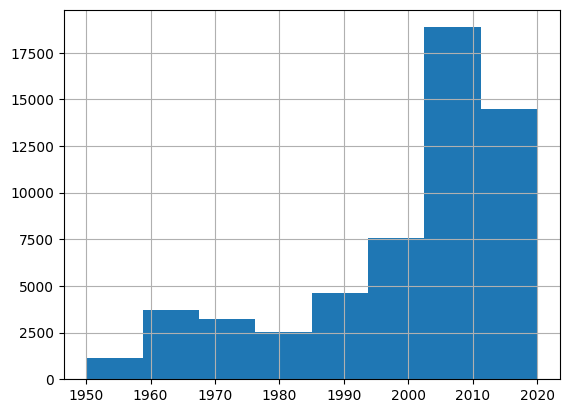

In [17]:
# remove the s from the end of each decade
tracks['decade'] = tracks['decade'].str.replace('s', '')

# convert decade into an integer
tracks['decade'] = tracks['decade'].astype(int)

# histogram of decades (with of 10 years)
tracks['decade'].hist(bins=8)

In [18]:
# convert decade to categorical
tracks['decade'] = pd.Categorical(tracks['decade'])

tracks.head()

,artist_name,artist_id,album_id,album_release_year,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_id,time_signature,duration_ms,track_name,album_name,key_mode,decade
0,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.787,0.889,-3.125,0.1280,0.00951,0.000322,0.6520,0.677,156.027,49YpGS0rVcRLtiDvx5JQyp,4,172399,Sorry for the Delay,DIRTIESTNASTIEST$UICIDE,D major,2020
1,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.759,0.833,-5.010,0.0779,0.00026,0.057300,0.1780,0.522,140.026,5dol1hrERJOReznLRJ2VVQ,4,183919,BUCKHEAD,DIRTIESTNASTIEST$UICIDE,B major,2020
2,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.840,0.934,-3.717,0.1190,0.04840,0.000000,0.0961,0.670,149.994,3QQXpvZd9qmzHZ02wDf2im,4,145842,I Dream of Chrome,DIRTIESTNASTIEST$UICIDE,C major,2020
3,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.894,0.767,-4.695,0.1370,0.02310,0.000024,0.5740,0.412,144.077,1UsvO5U72YRU8Xnq8Lp14O,4,140288,Champagne Face,DIRTIESTNASTIEST$UICIDE,A# minor,2020
4,$uicideboy$,1VPmR4DJC1PlOtd0IADAO0,7mxSvZIgElLmVTdUfVNQFz,2022,0.780,0.780,-2.857,0.0858,0.00147,0.000000,0.4720,0.446,118.014,2CkpD7gqMXrrpTCJ9TZ0bw,4,177289,The Serpent and the Rainbow,DIRTIESTNASTIEST$UICIDE,C major,2020


this data is not balanced - will assign a higher weight to minority classes, making the classifier pay more attention to it

In [28]:
# split tracks into train and test sets
from sklearn.model_selection import train_test_split

train, test = train_test_split(tracks, test_size=0.2, random_state=42)

X_train = train.drop('decade', axis=1)
y_train = train['decade']

X_test = test.drop('decade', axis=1)
y_test = test['decade']

# remove artist_name, artist_id, album_id, album_release_year, track_id, track_name, and album_name from X_train and X_test
X_train = X_train.drop(['artist_name', 'artist_id', 'album_id', 'album_release_year', 'track_id', 'track_name', 'album_name'], axis=1)
X_test = X_test.drop(['artist_name', 'artist_id', 'album_id', 'album_release_year', 'track_id', 'track_name', 'album_name'], axis=1)

# convert key_mode into a categorical variable
X_train['key_mode'] = pd.Categorical(X_train['key_mode'])
X_test['key_mode'] = pd.Categorical(X_test['key_mode'])

# one-hot encode key_mode
X_train = pd.get_dummies(X_train, columns=['key_mode'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['key_mode'], drop_first=True)

# Get missing columns in the training test
missing_cols = set(X_train.columns) - set(X_test.columns)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

X_train.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,...,key_mode_E major,key_mode_E minor,key_mode_F major,key_mode_F minor,key_mode_F# major,key_mode_F# minor,key_mode_G major,key_mode_G minor,key_mode_G# major,key_mode_G# minor
26046,0.380,0.3970,-11.571,0.0404,0.861000,0.098300,0.3150,0.4970,158.296,3,...,False,False,False,False,False,False,False,False,True,False
44678,0.412,0.0199,-30.781,0.0429,0.810000,0.129000,0.1070,0.3560,92.478,4,...,False,False,False,False,False,False,False,True,False,False
46384,0.624,0.7580,-4.242,0.0605,0.402000,0.000008,0.0529,0.5440,164.921,4,...,False,False,False,False,False,False,False,False,False,False
41824,0.681,0.7910,-6.292,0.1310,0.620000,0.000002,0.1060,0.7550,147.961,4,...,False,False,False,False,False,False,False,False,False,False
31210,0.672,0.4570,-10.647,0.2050,0.492000,0.000000,0.1840,0.5960,86.717,5,...,False,False,False,False,False,False,False,False,False,False
4272,0.645,0.5390,-24.456,0.8100,0.843000,0.000000,0.5400,0.0417,92.727,1,...,False,False,False,True,False,False,False,False,False,False
16247,0.564,0.9280,-9.199,0.0977,0.782000,0.859000,0.0783,0.5600,122.948,4,...,False,False,False,False,False,False,False,False,False,False
29899,0.736,0.6450,-7.822,0.0409,0.014200,0.016300,0.0556,0.9600,127.034,4,...,False,True,False,False,False,False,False,False,False,False
2145,0.773,0.6460,-5.600,0.1140,0.510000,0.000000,0.1680,0.6670,100.047,4,...,False,False,False,False,False,False,False,False,False,True
24207,0.926,0.5700,-5.226,0.0470,0.055100,0.001340,0.1090,0.2320,130.011,4,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# unique values of time signature
X_train['time_signature'].value_counts()

time_signature
4    39670
3     4162
5      762
1      354
0       57
Name: count, dtype: int64

In [32]:
X_train.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms', 'key_mode_A minor', 'key_mode_A# major',
       'key_mode_A# minor', 'key_mode_B major', 'key_mode_B minor',
       'key_mode_C major', 'key_mode_C minor', 'key_mode_C# major',
       'key_mode_C# minor', 'key_mode_D major', 'key_mode_D minor',
       'key_mode_D# major', 'key_mode_D# minor', 'key_mode_E major',
       'key_mode_E minor', 'key_mode_F major', 'key_mode_F minor',
       'key_mode_F# major', 'key_mode_F# minor', 'key_mode_G major',
       'key_mode_G minor', 'key_mode_G# major', 'key_mode_G# minor'],
      dtype='object')

In [33]:
# normalize all numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_ms']

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

X_train.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,...,key_mode_E major,key_mode_E minor,key_mode_F major,key_mode_F minor,key_mode_F# major,key_mode_F# minor,key_mode_G major,key_mode_G minor,key_mode_G# major,key_mode_G# minor
26046,-1.357017,-0.642669,-0.452505,-0.516630,1.377163,-0.157912,0.736759,0.023711,1.306646,-2.057212,...,False,False,False,False,False,False,False,False,True,False
44678,-1.160550,-2.173053,-4.397155,-0.495766,1.230713,-0.056586,-0.548340,-0.554447,-0.865757,0.239323,...,False,False,False,False,False,False,False,True,False,False
46384,0.141042,0.822377,1.052458,-0.348885,0.059112,-0.482329,-0.882589,0.216431,1.525312,0.239323,...,False,False,False,False,False,False,False,False,False,False
41824,0.490998,0.956300,0.631504,0.239474,0.685115,-0.482348,-0.554518,1.081619,0.965527,0.239323,...,False,False,False,False,False,False,False,False,False,False
31210,0.435742,-0.399171,-0.262768,0.857042,0.317553,-0.482355,-0.072606,0.429653,-1.055905,2.535859,...,False,False,False,False,False,False,False,False,False,False
4272,0.269973,-0.066390,-3.098357,5.906077,1.325475,-0.482355,2.126891,-1.843208,-0.857538,-6.650282,...,False,False,False,True,False,False,False,False,False,False
16247,-0.227333,1.512287,0.034570,-0.038432,1.150309,2.352802,-0.725659,0.282038,0.139942,0.239323,...,False,False,False,False,False,False,False,False,False,False
29899,0.828676,0.363789,0.317328,-0.512457,-1.054484,-0.428556,-0.865908,1.922204,0.274806,0.239323,...,False,True,False,False,False,False,False,False,False,False
2145,1.055840,0.367847,0.773601,0.097600,0.369242,-0.482355,-0.171460,0.720782,-0.615933,0.239323,...,False,False,False,False,False,False,False,False,False,True
24207,1.995197,0.059417,0.850400,-0.461550,-0.937037,-0.477932,-0.535983,-1.062899,0.373065,0.239323,...,False,False,False,False,False,False,False,False,False,False


Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


/Users/williammcgloin/anaconda3/envs/gtown/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


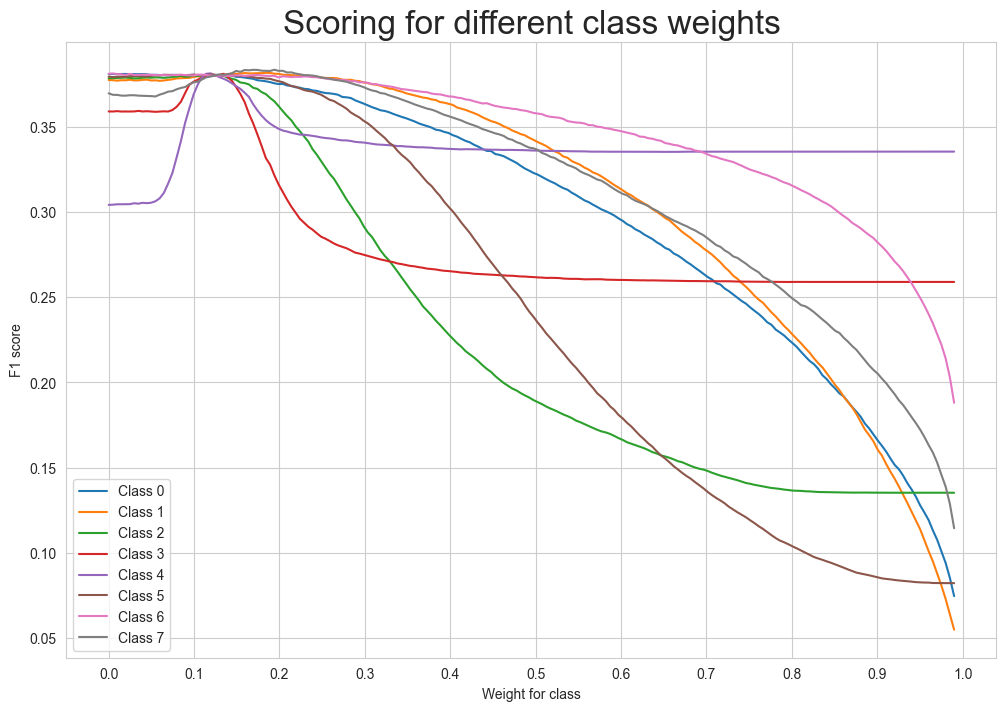

In [39]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

lr = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000, tol=0.0005)

n_classes = 10

# Unique classes in y_train
unique_classes = y_train.unique()

# Setting the range for class weights
weights = np.linspace(0.0, 0.99, 200)

# Create a list of weight dictionaries for grid search, ensuring class labels match y_train
param_grid = {'class_weight': [{cls: w if cls == unique_class else (1 - w)/(len(unique_classes) - 1) 
                                for cls in unique_classes} 
                               for unique_class in unique_classes for w in weights]}

# Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator=lr, 
                          param_grid=param_grid, 
                          cv=StratifiedKFold(n_splits=5), 
                          n_jobs=-1, 
                          scoring='f1_micro',  # Use a scoring method appropriate for multi-class
                          verbose=1).fit(X_train, y_train)

# Plotting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))

weight_scores = []
# Number of weight combinations per class
num_combinations_per_class = len(weights)

# Calculate the score for each class and weight
for i in range(n_classes):
    for idx, w in enumerate(weights):
        # Calculate the index for the current class and weight
        index = i * num_combinations_per_class + idx
        # Ensure that the index is within the bounds of the array
        if index < len(gridsearch.cv_results_['mean_test_score']):
            weight_scores.append({
                'class': i,
                'weight': w,
                'score': gridsearch.cv_results_['mean_test_score'][index]
            })
        else:
            break
# Create a DataFrame from the results
weigh_data = pd.DataFrame(weight_scores)


for i in range(n_classes):
    class_data = weigh_data[weigh_data['class'] == i]
    sns.lineplot(x=class_data['weight'], y=class_data['score'], label=f'Class {i}')


plt.xlabel('Weight for class')
plt.ylabel('F1 score')
plt.xticks([round(i/10, 1) for i in range(0, 11, 1)])
plt.title('Scoring for different class weights', fontsize=24)
plt.legend()
plt.show()
